In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
class Ubicacion(object):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def Muevase(self,dx,dy):
        return Ubicacion(self.x+dx,self.y+dy)
    def Donde_esta_x(self):
        return self.x
    def Donde_esta_y(self):
        return self.y
    def Distancia_desde(self,otro):
        return np.sqrt((self.x-otro.x)**2+(self.y-otro.y)**2)
    

In [6]:
class Campo(object):
    def __init__(self):
        self.borrachos={}
    def Agregue_Borracho(self,nombre,loc):
        if nombre in self.borrachos:
            raise ValueError("PP")
        else:
            self.borrachos[nombre]=loc
    def Tener_loc(self, borracho):
        if borracho not in self.borrachos:
            raise ValueError("PP2")
        else:
            return self.borrachos[borracho]
    def Mueva_el_borracho(self,ebrio):
        if ebrio not in self.borrachos:
            raise ValueError("PP3")
        else:
            dx,dy=ebrio.Avance()
            loc_actual=self.borrachos[ebrio]
            self.borrachos[ebrio]=loc_actual.Muevase(dx,dy)

In [7]:
class Borracho(object):
    def __init__(self,nombre=None):
        self.nombre=nombre
    def __str__(self):
        return str(nombre)
     

In [8]:
class Tipico_Borracho(Borracho):
    def Avance(self):
        posiciones=[(0,-1),(0,1),(1,0),(-1,0)]
        return random.choice(posiciones)
    

In [9]:
class Borracho_con_frio(Borracho):
    def Avance(self):
        posiciones=[(0,-1.1),(0,0.9),(1,0),(-1,0)]
        return random.choice(posiciones)

In [10]:
def caminata(campo,ebrio,Num_pasos):
    inicio=campo.Tener_loc(ebrio)
    for pasos in range(Num_pasos):
        campo.Mueva_el_borracho(ebrio)
    return inicio.Distancia_desde(campo.Tener_loc(ebrio))


In [11]:
def simular_caminata(Num_pasos,Num_intentos,tipo_de_borracho):
    mi_Borracho= tipo_de_borracho()
    origen=Ubicacion(0,0)
    distancias=[]
    for i in range(Num_intentos):
        c=Campo()
        c.Agregue_Borracho(mi_Borracho,origen)
        distancias.append(round(caminata(c,mi_Borracho,Num_pasos),2))
    return distancias

In [21]:
def Testear_Borracho(longitud_caminata,Num_intentos,tipo_borracho):
    distancias_p=[]
    num_P=[]
    for num_pasos in longitud_caminata:
        distancias = simular_caminata(num_pasos,Num_intentos,tipo_borracho)
        p=sum(distancias)/len(distancias)
        #print(tipo_borracho.__name__,"Caminata aleatoria de",num_pasos,"pasos")
        #print("promedio",p)
        #print("maximo",np.max(distancias),"minimo",np.min(distancias))
        distancias_p.append(p)
        num_P.append(num_pasos)
    return num_P, distancias_p


In [22]:
def Simular_todos(tipo_borrachos,longitud_caminata,Num_intentos):
    for tipo_borracho in tipo_borrachos:
        Testear_Borracho(longitud_caminata,Num_intentos,tipo_borracho)

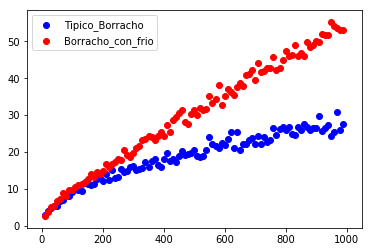

In [28]:
random.seed(0)
x,y=Testear_Borracho(np.arange(10,1000,10),100,Tipico_Borracho)
x1,y1=Testear_Borracho(np.arange(10,1000,10),100,Borracho_con_frio)
plt.scatter(x,y,c="b",label="Tipico_Borracho")
plt.scatter(x1,y1,c="r",label="Borracho_con_frio")
plt.legend()

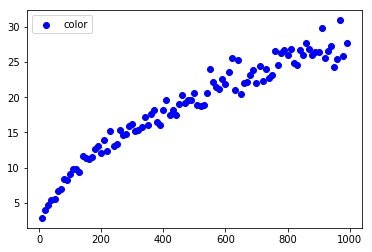